In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv


## Data discovering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')

In [4]:
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [5]:
train.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
test.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [7]:
train.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [8]:
train.shape

(15304, 12)

In [9]:
test.shape

(10204, 11)

In [10]:
train.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [12]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [13]:
train.select_dtypes('number').apply(pd.Series.nunique, axis = 0)


id                   15304
age                    106
hypertension             2
heart_disease            2
avg_glucose_level     3740
bmi                    407
stroke                   2
dtype: int64

<AxesSubplot:>

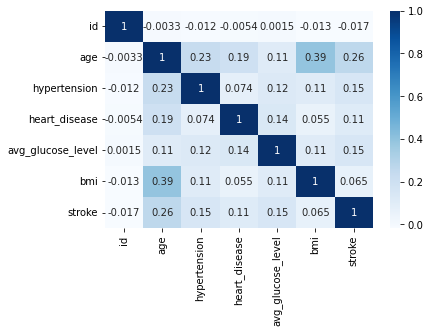

In [14]:
corr = train.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

## preprocessing

In [15]:
df=train
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [16]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes


In [17]:
df=df.drop('id',axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [18]:
cat_cols=['gender','ever_married','work_type','Residence_type','smoking_status','hypertension','heart_disease']
cat_cols

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'hypertension',
 'heart_disease']

In [19]:
num_cols=['age','avg_glucose_level','bmi',]
num_cols

['age', 'avg_glucose_level', 'bmi']

In [20]:
print(len(num_cols) + len(cat_cols))

10


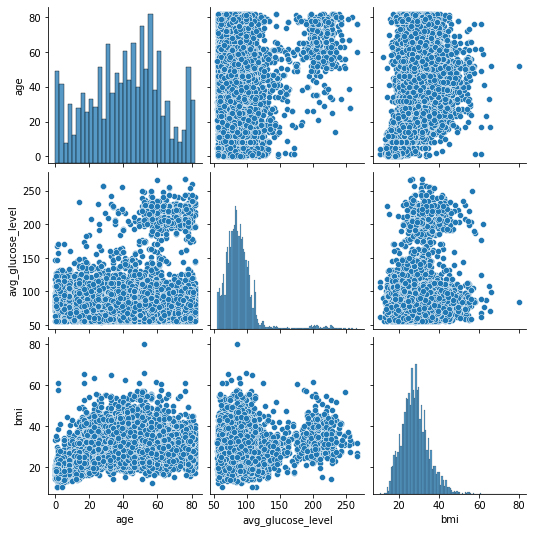

In [21]:
sns.pairplot(df[num_cols])

In [22]:
df_cat=df[cat_cols]
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,Male,Yes,Private,Urban,never smoked,0,0
1,Male,Yes,Private,Rural,formerly smoked,0,0
2,Female,Yes,Private,Rural,Unknown,0,0
3,Male,Yes,Private,Urban,never smoked,0,0
4,Female,No,Private,Rural,never smoked,0,0
...,...,...,...,...,...,...,...
15299,Female,No,Govt_job,Urban,never smoked,0,0
15300,Female,Yes,Private,Urban,never smoked,1,0
15301,Female,Yes,Self-employed,Urban,never smoked,0,0
15302,Male,Yes,Private,Rural,Unknown,0,0


In [23]:
gender_count = df_cat['gender'].value_counts()
gender_count


Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

#### maybe we should reject the Other gender row

In [24]:
df_cat['gender'].replace({"Male": 1, "Female": 2,"Other":3},inplace=True)
df_cat['gender']

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0        1
1        1
2        2
3        1
4        2
        ..
15299    2
15300    2
15301    2
15302    1
15303    2
Name: gender, Length: 15304, dtype: int64

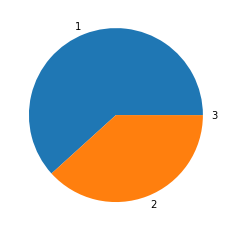

In [25]:

plt.pie(df_cat['gender'].value_counts(),labels=['1','2','3'])
plt.show() 

In [26]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,1,Yes,Private,Urban,never smoked,0,0
1,1,Yes,Private,Rural,formerly smoked,0,0
2,2,Yes,Private,Rural,Unknown,0,0
3,1,Yes,Private,Urban,never smoked,0,0
4,2,No,Private,Rural,never smoked,0,0
...,...,...,...,...,...,...,...
15299,2,No,Govt_job,Urban,never smoked,0,0
15300,2,Yes,Private,Urban,never smoked,1,0
15301,2,Yes,Self-employed,Urban,never smoked,0,0
15302,1,Yes,Private,Rural,Unknown,0,0


In [27]:
df_cat['ever_married'].value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

In [28]:
df_cat['ever_married'].replace({"No": 0, "Yes":1},inplace=True)
df_cat['ever_married']

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0        1
1        1
2        1
3        1
4        0
        ..
15299    0
15300    1
15301    1
15302    1
15303    0
Name: ever_married, Length: 15304, dtype: int64

In [29]:
df_cat['ever_married'].value_counts()

1    10385
0     4919
Name: ever_married, dtype: int64

In [30]:
df_cat['work_type'].value_counts()

Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

In [31]:
df_cat['work_type'].replace({"Private": 1, "children":2,"Self-employed":3,"Govt_job":4,"Never_worked":5},inplace=True)
df_cat['work_type']


0        1
1        1
2        1
3        1
4        1
        ..
15299    4
15300    1
15301    3
15302    1
15303    1
Name: work_type, Length: 15304, dtype: int64

In [32]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,1,1,1,Urban,never smoked,0,0
1,1,1,1,Rural,formerly smoked,0,0
2,2,1,1,Rural,Unknown,0,0
3,1,1,1,Urban,never smoked,0,0
4,2,0,1,Rural,never smoked,0,0
...,...,...,...,...,...,...,...
15299,2,0,4,Urban,never smoked,0,0
15300,2,1,1,Urban,never smoked,1,0
15301,2,1,3,Urban,never smoked,0,0
15302,1,1,1,Rural,Unknown,0,0


In [33]:
df_cat['Residence_type'].value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

In [34]:
df_cat['Residence_type'].replace({"Rural":1, "Urban":2},inplace=True)
df_cat['Residence_type'].value_counts()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


1    7664
2    7640
Name: Residence_type, dtype: int64

In [35]:
df_cat['smoking_status'].value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [36]:
df_cat['smoking_status'].replace({"never smoked":1, "Unknown":2,"formerly smoked":3,"smokes":4},inplace=True)
df_cat['smoking_status'].value_counts()

1    6281
2    4543
3    2337
4    2143
Name: smoking_status, dtype: int64

In [37]:
df_cat

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease
0,1,1,1,2,1,0,0
1,1,1,1,1,3,0,0
2,2,1,1,1,2,0,0
3,1,1,1,2,1,0,0
4,2,0,1,1,1,0,0
...,...,...,...,...,...,...,...
15299,2,0,4,2,1,0,0
15300,2,1,1,2,1,1,0
15301,2,1,3,2,1,0,0
15302,1,1,1,1,2,0,0


<AxesSubplot:>

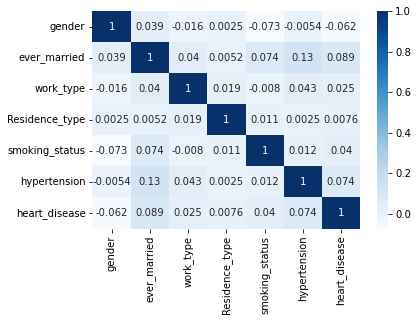

In [38]:
corr = df_cat.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

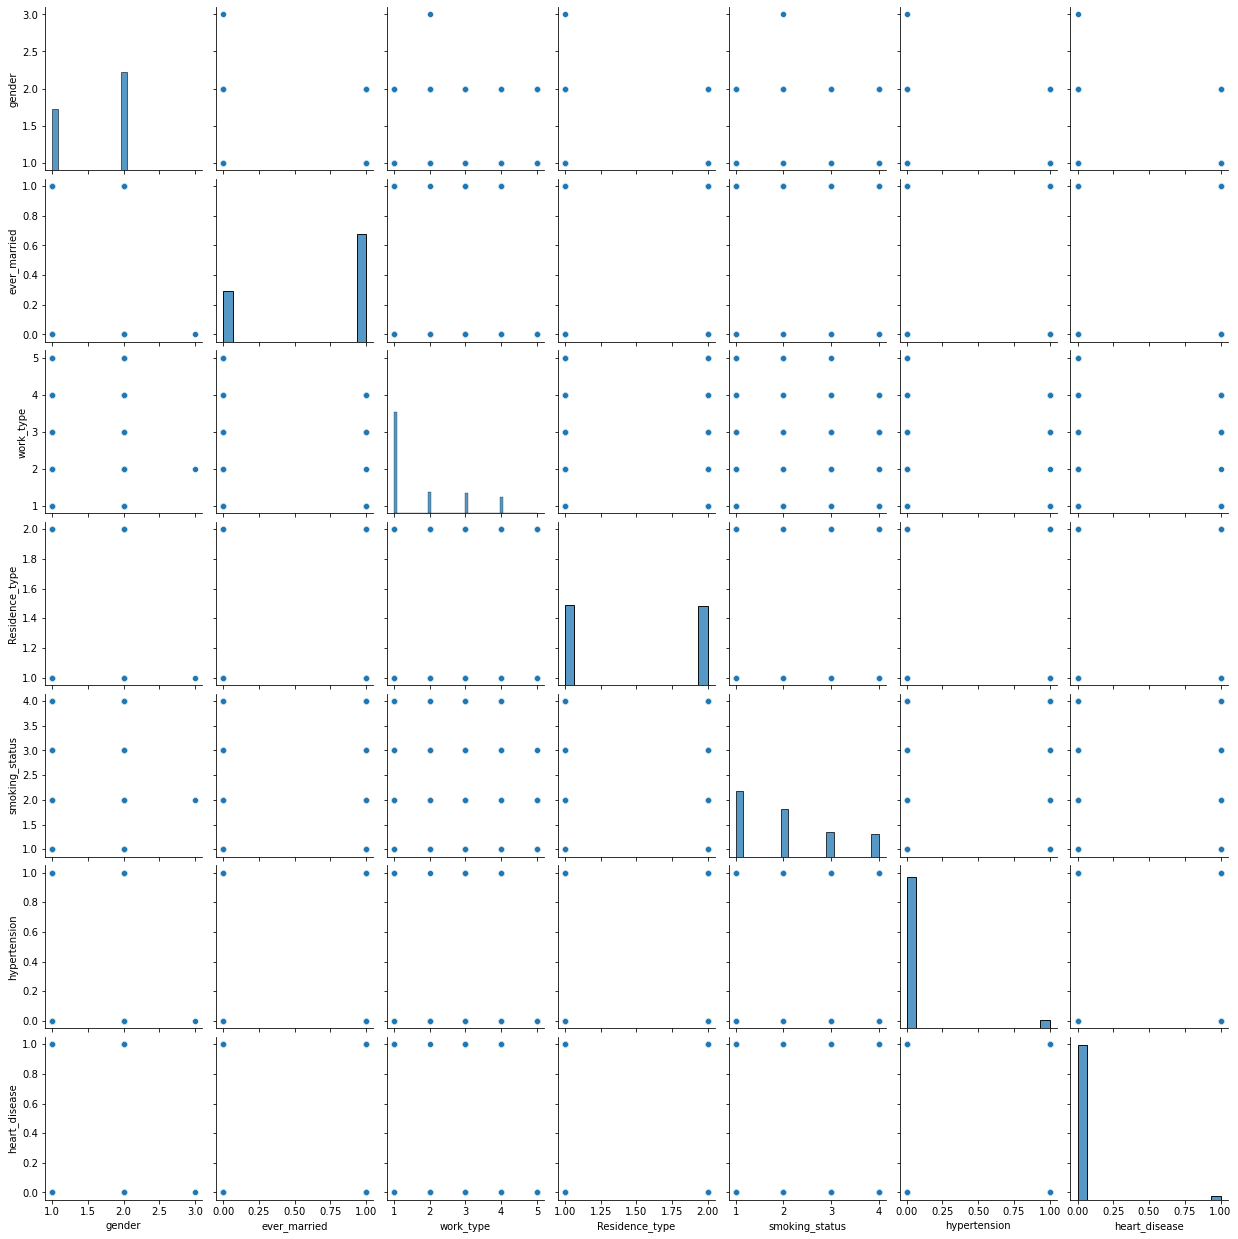

In [39]:
sns.pairplot(df_cat)

In [40]:
df[num_cols]

,age,avg_glucose_level,bmi
0,28.0,79.53,31.1
1,33.0,78.44,23.9
2,42.0,103.00,40.3
3,56.0,64.87,28.8
4,24.0,73.36,28.8
...,...,...,...
15299,22.0,72.63,19.5
15300,46.0,101.19,32.1
15301,75.0,87.69,26.2
15302,46.0,101.13,22.5


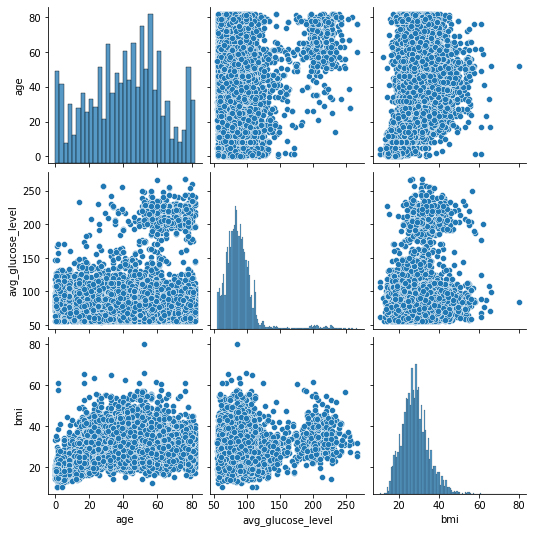

In [41]:
sns.pairplot(df[num_cols])

In [42]:
df_num=df[num_cols]
df_num

,age,avg_glucose_level,bmi
0,28.0,79.53,31.1
1,33.0,78.44,23.9
2,42.0,103.00,40.3
3,56.0,64.87,28.8
4,24.0,73.36,28.8
...,...,...,...
15299,22.0,72.63,19.5
15300,46.0,101.19,32.1
15301,75.0,87.69,26.2
15302,46.0,101.13,22.5


In [43]:
df['age'].min()

0.08

In [44]:
df_num['Age_group'] = pd.cut(x=df_num['age'], bins=[-1, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
df_num['Age_group']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        young adult
1        young adult
2         middle age
3         middle age
4        young adult
            ...     
15299    young adult
15300     middle age
15301      pensioner
15302     middle age
15303          child
Name: Age_group, Length: 15304, dtype: category
Categories (4, object): ['child' < 'young adult' < 'middle age' < 'pensioner']

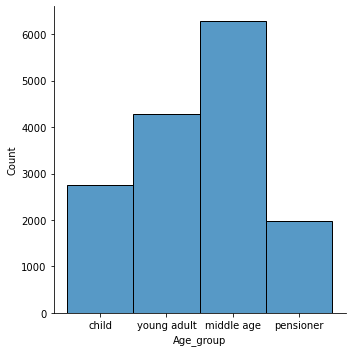

In [45]:
sns.displot(df_num['Age_group'])


In [46]:
age_count = df_num['Age_group'].value_counts()
age_count

middle age     6285
young adult    4290
child          2756
pensioner      1973
Name: Age_group, dtype: int64

In [47]:
age_percent = age_count / len(df)
age_percent

middle age     0.410677
young adult    0.280319
child          0.180084
pensioner      0.128921
Name: Age_group, dtype: float64

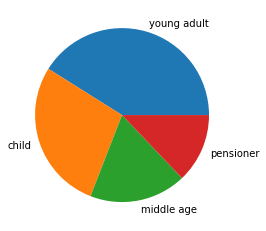

In [48]:
mylabels = ["young adult", "child", "middle age", "pensioner"]
plt.pie(age_percent, labels=mylabels)
plt.show() 

In [49]:
df_num['Age_group'].replace({"young adult": 1, "child": 2, "middle age": 3, "pensioner": 4},inplace=True)
df_num['Age_group']

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0        1
1        1
2        3
3        3
4        1
        ..
15299    1
15300    3
15301    4
15302    3
15303    2
Name: Age_group, Length: 15304, dtype: int64

In [50]:
df_num['Age_group'] = df_num['Age_group'].astype(int)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
df_num=df_num.drop('age',axis=1)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


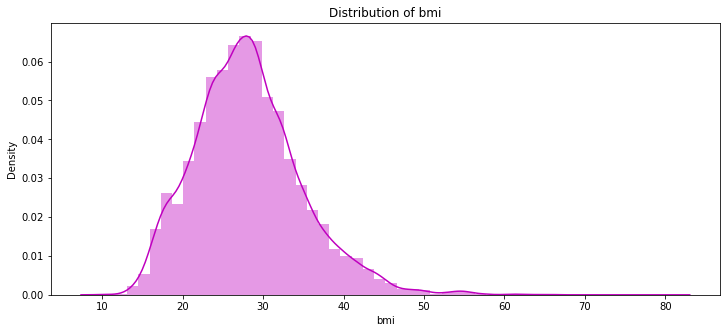

In [52]:
plt.figure(figsize=(12,5))
plt.title("Distribution of bmi")
ax = sns.distplot(df_num["bmi"], color = 'm')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


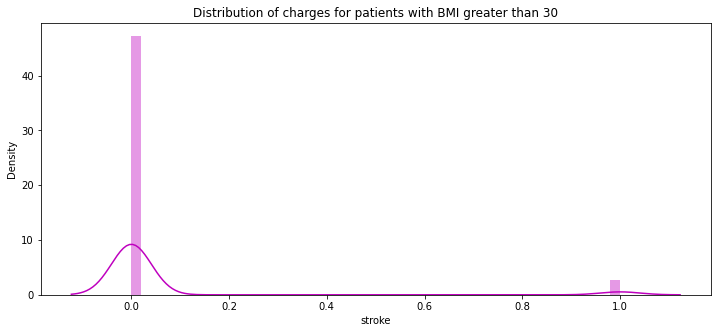

In [53]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(df[(df.bmi >= 30)]['stroke'], color = 'm')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


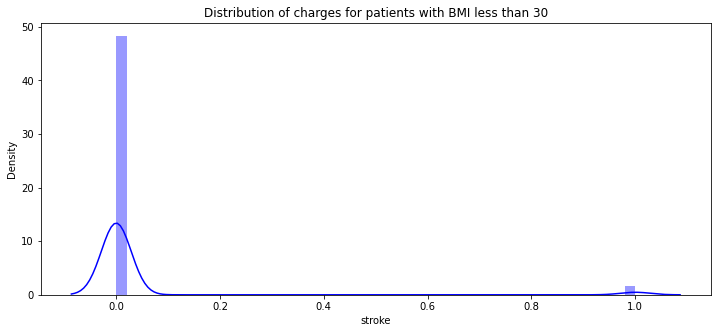

In [54]:
plt.figure(figsize=(12,5))
plt.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(df[(df.bmi < 30)]['stroke'], color = 'b')

In [55]:
print(df_num['bmi'].max())
print(df_num['bmi'].min())

80.1
10.3


In [56]:
df_num['bmi_group'] = pd.cut(x=df_num['bmi'], bins=[10,16,16.9 ,18.4,24.9,29.9,34.9,39.9,100], labels=['Underweight (Severe thinness)','Underweight (Moderate thinness)','Underweight (Mild thinness)','Normal range', 'Overweight (Pre-obese)','Obese (Class I)','Obese (Class II)','Obese (Class III)'])
df_num['bmi_group']

0               Obese (Class I)
1                  Normal range
2             Obese (Class III)
3        Overweight (Pre-obese)
4        Overweight (Pre-obese)
                  ...          
15299              Normal range
15300           Obese (Class I)
15301    Overweight (Pre-obese)
15302              Normal range
15303              Normal range
Name: bmi_group, Length: 15304, dtype: category
Categories (8, object): ['Underweight (Severe thinness)' < 'Underweight (Moderate thinness)' < 'Underweight (Mild thinness)' < 'Normal range' < 'Overweight (Pre-obese)' < 'Obese (Class I)' < 'Obese (Class II)' < 'Obese (Class III)']

In [57]:
bmi_count = df_num['bmi'].value_counts()
bmi_percent = bmi_count / len(df_num)
print(bmi_percent)

23.4    0.011304
28.7    0.010651
28.4    0.010259
26.7    0.009801
27.7    0.009017
          ...   
51.0    0.000065
57.3    0.000065
14.0    0.000065
47.0    0.000065
44.1    0.000065
Name: bmi, Length: 407, dtype: float64


In [58]:
df_num['bmi'].value_counts()

23.4    173
28.7    163
28.4    157
26.7    150
27.7    138
       ... 
51.0      1
57.3      1
14.0      1
47.0      1
44.1      1
Name: bmi, Length: 407, dtype: int64

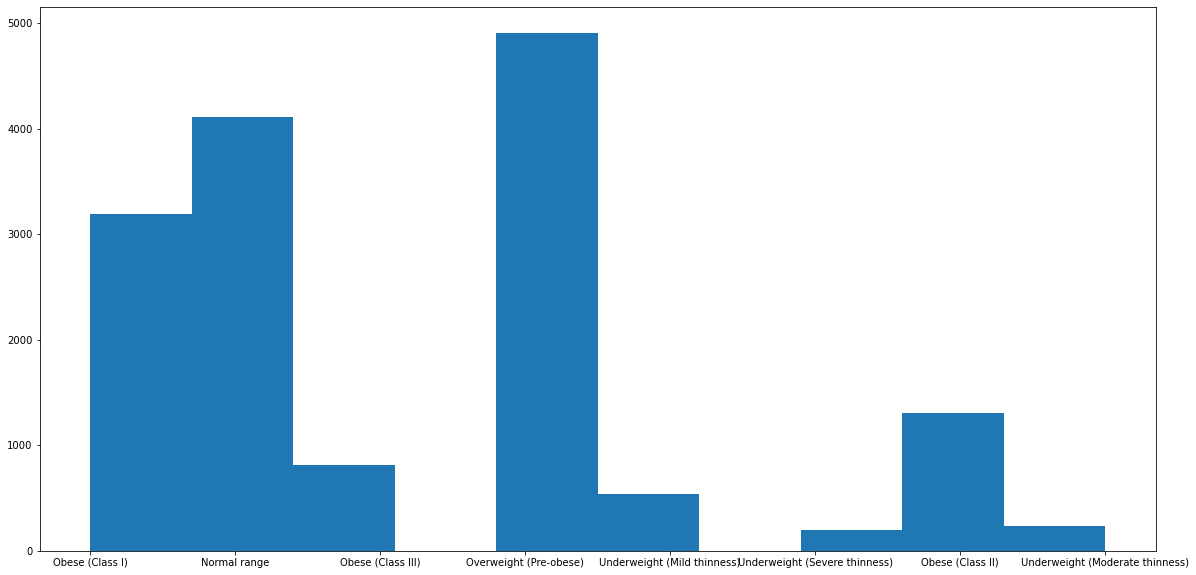

In [59]:
plt.figure(figsize=(20,10))

plt.hist(df_num['bmi_group'])
plt.show() 

In [60]:
df_num

,avg_glucose_level,bmi,Age_group,bmi_group
0,79.53,31.1,1,Obese (Class I)
1,78.44,23.9,1,Normal range
2,103.00,40.3,3,Obese (Class III)
3,64.87,28.8,3,Overweight (Pre-obese)
4,73.36,28.8,1,Overweight (Pre-obese)
...,...,...,...,...
15299,72.63,19.5,1,Normal range
15300,101.19,32.1,3,Obese (Class I)
15301,87.69,26.2,4,Overweight (Pre-obese)
15302,101.13,22.5,3,Normal range


In [61]:
df_num['bmi_group'].replace({'Underweight (Severe thinness)':0,'Underweight (Moderate thinness)':1,'Underweight (Mild thinness)':2,'Normal range':3, 'Overweight (Pre-obese)':4,'Obese (Class I)':5,'Obese (Class II)':6,'Obese (Class III)':7},inplace=True)
df_num['bmi_group']


0        5
1        3
2        7
3        4
4        4
        ..
15299    3
15300    5
15301    4
15302    3
15303    3
Name: bmi_group, Length: 15304, dtype: int64

In [62]:
df_num=df_num.drop('bmi',axis=1)

<AxesSubplot:>

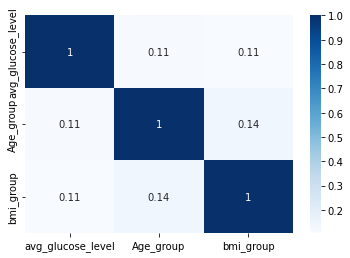

In [63]:
corr = df_num.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [64]:
df_num['avg_glucose_level'].describe()

count    15304.000000
mean        89.039853
std         25.476102
min         55.220000
25%         74.900000
50%         85.120000
75%         96.980000
max        267.600000
Name: avg_glucose_level, dtype: float64

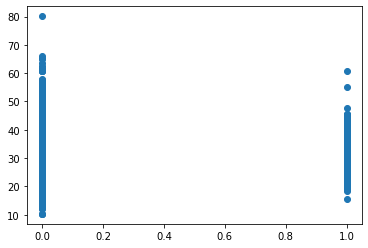

In [65]:
plt.scatter(train['stroke'],train['bmi'])

In [66]:
train['avg_glucose_level'].max()

267.6

In [67]:
df_num['avg_glucose_level_group'] = pd.cut(x=df_num['avg_glucose_level'], bins=[55,99,125,280], labels=['normal', 'prediabetes', 'diabetes'])
df_num['avg_glucose_level_group']

0             normal
1             normal
2        prediabetes
3             normal
4             normal
            ...     
15299         normal
15300    prediabetes
15301         normal
15302    prediabetes
15303         normal
Name: avg_glucose_level_group, Length: 15304, dtype: category
Categories (3, object): ['normal' < 'prediabetes' < 'diabetes']

In [68]:
df_num['avg_glucose_level']

0         79.53
1         78.44
2        103.00
3         64.87
4         73.36
          ...  
15299     72.63
15300    101.19
15301     87.69
15302    101.13
15303     85.12
Name: avg_glucose_level, Length: 15304, dtype: float64

In [69]:
df_num=df_num.drop('avg_glucose_level',axis=1)
df_num

,Age_group,bmi_group,avg_glucose_level_group
0,1,5,normal
1,1,3,normal
2,3,7,prediabetes
3,3,4,normal
4,1,4,normal
...,...,...,...
15299,1,3,normal
15300,3,5,prediabetes
15301,4,4,normal
15302,3,3,prediabetes


In [70]:
df_num['avg_glucose_level_group'].replace({'normal': 1, 'prediabetes': 2, 'diabetes': 3},inplace=True)
df_num['avg_glucose_level_group']


0        1
1        1
2        2
3        1
4        1
        ..
15299    1
15300    2
15301    1
15302    2
15303    1
Name: avg_glucose_level_group, Length: 15304, dtype: int64

In [71]:
df_num

,Age_group,bmi_group,avg_glucose_level_group
0,1,5,1
1,1,3,1
2,3,7,2
3,3,4,1
4,1,4,1
...,...,...,...
15299,1,3,1
15300,3,5,2
15301,4,4,1
15302,3,3,2


### Training

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X=pd.concat([df_cat, df_num], axis=1)
X

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,Age_group,bmi_group,avg_glucose_level_group
0,1,1,1,2,1,0,0,1,5,1
1,1,1,1,1,3,0,0,1,3,1
2,2,1,1,1,2,0,0,3,7,2
3,1,1,1,2,1,0,0,3,4,1
4,2,0,1,1,1,0,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...
15299,2,0,4,2,1,0,0,1,3,1
15300,2,1,1,2,1,1,0,3,5,2
15301,2,1,3,2,1,0,0,4,4,1
15302,1,1,1,1,2,0,0,3,3,2


In [74]:
y=train['stroke']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (12243, 10)
Test set: (3061, 10)


In [76]:
# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier(n_neighbors=10)

# model.fit(X_train, y_train)

# print('train score:', model.score(X_train, y_train))
# print('test score:', model.score(X_test, y_test))

In [77]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,roc_auc_score,roc_curve


In [79]:
# def generate_features(df):
#     df['age/bmi'] = df.age / df.bmi
#     df['age*bmi'] = df.age * df.bmi
#     df['bmi/prime'] = df.bmi / 25
#     df['obesity'] = df.avg_glucose_level * df.bmi / 1000
#     df['blood_heart']= df.hypertension*df.heart_disease
#     return df

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
models=[KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    xgb.XGBClassifier(),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
       ]

for model in models:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    ROC=roc_auc_score(y_test,y_pred)
    print("model",model)
    print("ROC :",ROC)
    print("score",model.score(X_test,y_test))
    print("#######")
    

model KNeighborsClassifier(n_neighbors=3)
ROC : 0.5147954229325774
score 0.9506697157791572
#######
model SVC(C=0.025, kernel='linear')
ROC : 0.5
score 0.957530218882718
#######
model SVC(C=1, gamma=2)
ROC : 0.5019696611815343
score 0.9542633126429272
#######
model XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
ROC : 0.5392370679474057
score 0.95

In [81]:
from sklearn.model_selection import GridSearchCV

nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='roc_auc') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'var_smoothing': 0.8111308307896871}

In [82]:
gs_NB.best_params_

{'var_smoothing': 0.8111308307896871}

In [83]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [200, 500]})

In [84]:
CV_rfc.best_params_

{'n_estimators': 200}

In [85]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')

In [86]:
model= rfc1
model.fit(X,y)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200,
                       random_state=42)

In [87]:
# model= QuadraticDiscriminantAnalysis()
# model.fit(X,y)

In [88]:
model.score(X_train,y_train)

0.959160336518827

In [89]:
y_pred=model.predict_proba(X_test)[:,1]
y_pred

array([0.00125621, 0.00070953, 0.02689719, ..., 0.03334561, 0.01293046,
       0.01278518])

In [90]:
ROC=roc_auc_score(y_test,y_pred)
print("model",model)
print("ROC :",ROC)
print("score",model.score(X_test,y_test))
print("#######")

model RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200,
                       random_state=42)
ROC : 0.8848909534682308
score 0.9578569095066971
#######


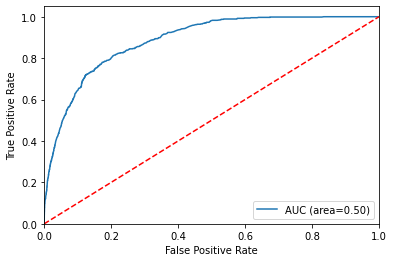

In [91]:
roc_auc=roc_auc_score(y,model.predict(X))
fpr,tpr,thresholds = roc_curve(y,model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC (area=%0.2f)"%roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [92]:
a=pd.concat([X, df['stroke']], axis=1)
a

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,Age_group,bmi_group,avg_glucose_level_group,stroke
0,1,1,1,2,1,0,0,1,5,1,0
1,1,1,1,1,3,0,0,1,3,1,0
2,2,1,1,1,2,0,0,3,7,2,0
3,1,1,1,2,1,0,0,3,4,1,0
4,2,0,1,1,1,0,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,2,0,4,2,1,0,0,1,3,1,0
15300,2,1,1,2,1,1,0,3,5,2,0
15301,2,1,3,2,1,0,0,4,4,1,0
15302,1,1,1,1,2,0,0,3,3,2,0


<AxesSubplot:>

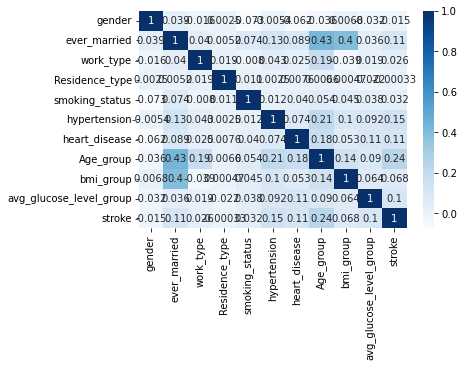

In [93]:
corr = a.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

## TESTING

In [94]:
df_test=test

In [95]:
df_test=df_test.drop('id',axis=1)
test_cat_cols=['gender','ever_married','work_type','Residence_type','smoking_status','hypertension','heart_disease']
test_num_cols=['age','avg_glucose_level','bmi',]
test_df_cat=df_test[test_cat_cols]
test_df_num=df_test[test_num_cols]
test_df_cat['gender'].replace({"Male": 1, "Female": 2,"Other":3},inplace=True)
test_df_cat['ever_married'].replace({"No": 0, "Yes":1},inplace=True)
test_df_cat['Residence_type'].replace({"Rural":1, "Urban":2},inplace=True)
test_df_cat['work_type'].replace({"Private": 1, "children":2,"Self-employed":3,"Govt_job":4,"Never_worked":5},inplace=True)
test_df_cat['smoking_status'].replace({"never smoked":1, "Unknown":2,"formerly smoked":3,"smokes":4},inplace=True)
test_df_num['Age_group'] = pd.cut(x=test_df_num['age'], bins=[-1, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
test_df_num['Age_group'].replace({"young adult": 1, "child": 2, "middle age": 3, "pensioner": 4},inplace=True)
test_df_num['Age_group'] = test_df_num['Age_group'].astype(int)
test_df_num=test_df_num.drop('age',axis=1)
test_df_num['bmi_group'] = pd.cut(x=test_df_num['bmi'], bins=[10,16,16.9 ,18.4,24.9,29.9,34.9,39.9,100], labels=['Underweight (Severe thinness)','Underweight (Moderate thinness)','Underweight (Mild thinness)','Normal range', 'Overweight (Pre-obese)','Obese (Class I)','Obese (Class II)','Obese (Class III)'])
test_df_num['bmi_group'].replace({'Underweight (Severe thinness)':0,'Underweight (Moderate thinness)':1,'Underweight (Mild thinness)':2,'Normal range':3, 'Overweight (Pre-obese)':4,'Obese (Class I)':5,'Obese (Class II)':6,'Obese (Class III)':7},inplace=True)
test_df_num=test_df_num.drop('bmi',axis=1)
test_df_num['avg_glucose_level_group'] = pd.cut(x=test_df_num['avg_glucose_level'], bins=[55,99,125,280], labels=['normal', 'prediabetes', 'diabetes'])
test_df_num=test_df_num.drop('avg_glucose_level',axis=1)
test_df_num['avg_glucose_level_group'].replace({'normal': 1, 'prediabetes': 2, 'diabetes': 3},inplace=True)


/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [96]:
tst=pd.concat([test_df_cat, test_df_num], axis=1)
tst

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,Age_group,bmi_group,avg_glucose_level_group
0,2,1,1,1,2,0,0,3,5,1
1,1,1,1,2,2,1,0,4,4,1
2,2,0,2,2,2,0,0,2,3,2
3,2,1,4,2,4,0,0,3,7,1
4,1,1,1,1,4,0,0,1,5,2
...,...,...,...,...,...,...,...,...,...,...
10199,2,0,1,2,1,0,0,1,2,1
10200,1,1,1,2,2,0,0,3,4,2
10201,2,0,2,1,2,0,0,2,2,2
10202,1,1,1,2,1,0,0,1,4,1


In [97]:
submission=pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')

In [98]:
import math

In [99]:
prediction=model.predict_proba(tst,)[:,1]
prediction=round(pd.DataFrame(prediction),2)
submission['stroke']=prediction
submission

,id,stroke
0,15304,0.03
1,15305,0.24
2,15306,0.00
3,15307,0.04
4,15308,0.02
...,...,...
10199,25503,0.00
10200,25504,0.03
10201,25505,0.00
10202,25506,0.01


In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[2931,    0],
       [ 129,    1]])

In [101]:
submission['stroke'].value_counts()


0.03    2833
0.00    2700
0.01    1541
0.02     888
0.04     383
0.17     321
0.14     189
0.13     157
0.16     133
0.07     120
0.06     114
0.08      97
0.05      86
0.15      77
0.21      67
0.20      48
0.18      46
0.09      42
0.23      40
0.19      39
0.22      29
0.12      28
0.24      28
0.10      19
0.25      17
0.38      16
0.37      14
0.33      13
0.28      12
0.32      12
0.35      11
0.11      10
0.31      10
0.34      10
0.26       7
0.30       7
0.40       6
0.29       6
0.36       5
0.27       5
0.39       4
0.47       3
0.42       3
0.46       2
0.45       2
0.41       2
0.43       1
0.44       1
Name: stroke, dtype: int64

In [102]:
submission.to_csv('LST.csv',index=False)
